In [1]:
from src.datasets.shape_net.shape_net_v3_sdf import ShapeNetV3SDF
from src.training.ModelTrainer import ModelTrainer
#from src.datasets.shape_net.shape_net_v2_sdf import ShapeNetV2SDF
from src.utils.util import seed_all
from src.utils.visualizations import visualize_sdf_as_mesh
from src.pre_processing.extract_snet_indices_global import ExtractSnetIndices
from tqdm.notebook import tqdm as tqdm
import numpy as np
import torch
%load_ext autoreload
%load_ext tensorboard
%autoreload 2
seed_all(111)
x = torch.cuda.mem_get_info()
trainer = ModelTrainer(dataset_type=ShapeNetV3SDF,
                       options={"tdm_notebook": True})

dataset = trainer.data_loader_handler.dataset
from tqdm.notebook import tqdm as tqdm
import json
print(x)

Using device: cuda:0
{'name': 'presentationModelComparison', 'description': 'plzWork2', 'experiment_id': 'Dev', 'extra_notes': 'none', 'logs_dir': 'logs', 'is_train': True, 'device': 'cuda:0', 'batch_size': 16, 'num_workers': 16, 'test_size': 0.1, 'n_epochs': 50000, 'append_loss_every': 50, 'print_every': 10, 'validate_every': 1480, 'save_every': 1480, 'save_every_nepochs': 5, 'start_epoch': 0, 'start_iteration': 0, 'visualize_every': 200, 'apply_metrics_every': 1480, 'load_ckpt': True, 'ckpt_path': 'logs/GlobalPVQVAE/FullTrain/2024_06_03_12_37_19/checkpoints/epoch-latest.ckpt', 'use_scheduler': True, 'apply_metrics_batch_count': 5}


- Creating new directory logs/presentationModelComparison/Dev/2024_06_05_22_06_40
- Creating new directory logs/presentationModelComparison/Dev/2024_06_05_22_06_40/checkpoints
- Creating new directory logs/presentationModelComparison/Dev/2024_06_05_22_06_40/tb
- Creating new directory logs/presentationModelComparison/Dev/2024_06_05_22_06_40/visuals
- Creating new directory logs/presentationModelComparison/Dev/2024_06_05_22_06_40/modelsummary


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[*] Enc has Attn at i_level, i_block: 3, 0
Decoding of shape (1, 64, 8, 8, 8) = 32768 dimensions.
[*] Dec has Attn at i_level, i_block: 3, 0
Using device: cuda:0
Initializing model weights with normal initialization
Model loaded from logs/GlobalPVQVAE/FullTrain/2024_06_03_12_37_19/checkpoints/epoch-latest.ckpt
Model size: 99.591MB
Total_params: 26.1M
(10120527872, 10385358848)


In [2]:
dataset = trainer.data_loader_handler.dataset
len(dataset)
global_dict = {}
patched_dict = {}
indices = np.arange(1,513)
for index in indices:
    global_dict[f"{index}"] = 0
    patched_dict[f"{index}"] = 0

#global_dict

In [3]:
for item in tqdm(dataset, total=len(dataset)):
    code_idx_patched = item["idx"].flatten()
    code_idx_global = item["idx_global"].flatten()
    for idx in code_idx_global:
        global_dict[f"{idx}"] += 1
    for idx_g in code_idx_patched:
        patched_dict[f"{idx_g}"] += 1


  0%|          | 0/6579 [00:00<?, ?it/s]

In [ ]:
global_dict
patched_dict

In [16]:
 with open(f"./src/testVisuals/global_indices.json", "w") as file1:
            json_object = json.dumps(global_dict, indent=4)
            file1.write(str(json_object))

with open(f"./src/testVisuals/patched_indices.json", "w") as file1:
            json_object = json.dumps(patched_dict, indent=4)
            file1.write(str(json_object))
            

In [9]:
k = np.array(list(global_dict.values())).sum()

In [10]:
k

3368448

In [11]:
k = np.array(list(patched_dict.values())).sum()

In [12]:
k

3368448

In [15]:
for index in indices:
    global_dict[f"{index}"] =  global_dict[f"{index}"]*100
    patched_dict[f"{index}"] = patched_dict[f"{index}"]*100

Text(0.5, 1.0, 'Codebook Index')

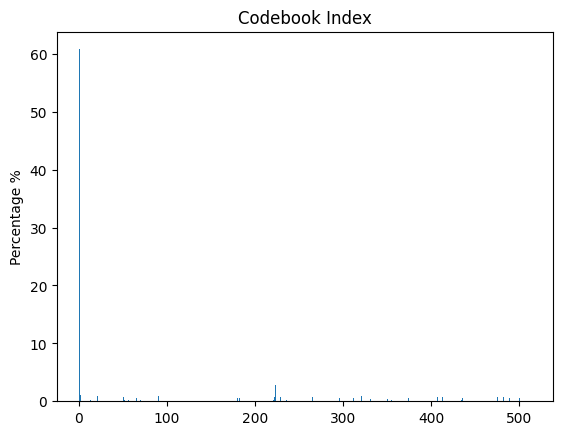

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

percentages = np.array(list(patched_dict.values()))
ax.bar(indices, percentages)
ax.set_ylabel('Percentage %')
ax.set_title('Codebook Index')


In [24]:
percentages = np.array(list(global_dict.values()))

In [25]:
percentages[percentages==0].shape

(155,)

In [26]:
155/512

0.302734375